## HomeWork 2
### Seyed Mohammad Sheikh Ahmadi Gandab
### s327914@studenti.polito.it


###  Ehsan Dashti
###  s316511@studenti.polito.it

# Exercise 1

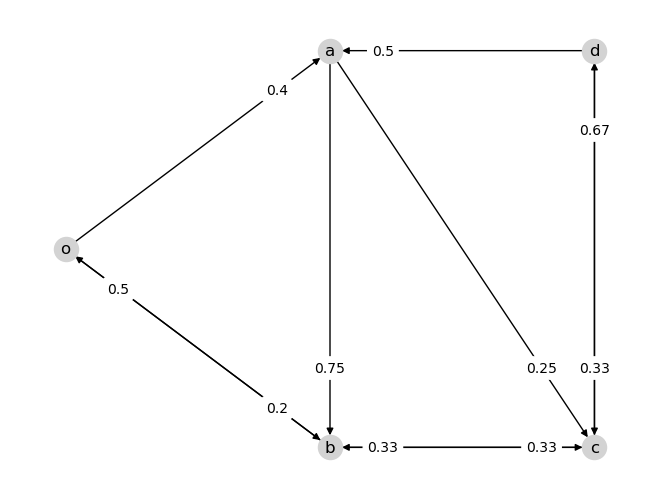

Number of nodes: 5
Weight Vector:
 [0.6   1.    0.833 1.    0.833]
Diagonal Matrix D:
 [[0.6   0.    0.    0.    0.   ]
 [0.    1.    0.    0.    0.   ]
 [0.    0.    0.833 0.    0.   ]
 [0.    0.    0.    1.    0.   ]
 [0.    0.    0.    0.    0.833]]
Normalized Transition Matrix P:
 [[0.    0.667 0.333 0.    0.   ]
 [0.    0.    0.75  0.25  0.   ]
 [0.6   0.    0.    0.4   0.   ]
 [0.    0.    0.333 0.    0.667]
 [0.    0.6   0.    0.4   0.   ]]
Matrix Q:
 [[0.4   0.4   0.2   0.    0.   ]
 [0.    0.    0.75  0.25  0.   ]
 [0.5   0.    0.167 0.333 0.   ]
 [0.    0.    0.333 0.    0.667]
 [0.    0.5   0.    0.333 0.167]]
Invariant Distribution (pi_bar):
 [0.231 0.165 0.277 0.182 0.146]


In [16]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

# Set a fixed seed for random number generation and adjust numpy print settings
np.random.seed(42)
np.set_printoptions(precision=3, suppress=True)

# Define the matrix representing transition probabilities
transition_matrix = np.array([
    [0, 2 / 5, 1 / 5, 0, 0],
    [0, 0, 3 / 4, 1 / 4, 0],
    [1 / 2, 0, 0, 1 / 3, 0],
    [0, 0, 1 / 3, 0, 2 / 3],
    [0, 1 / 2, 0, 1 / 3, 0]
])

# Create and populate a directed graph
graph = nx.DiGraph()
nodes = ['o', 'a', 'b', 'c', 'd']
edges = [
    ('o', 'a', 2 / 5), ('o', 'b', 1 / 5), ('a', 'b', 3 / 4), ('a', 'c', 1 / 4),
    ('b', 'o', 1 / 2), ('b', 'c', 1 / 3), ('c', 'b', 1 / 3), ('c', 'd', 2 / 3),
    ('d', 'a', 1 / 2), ('d', 'c', 1 / 3)
]
graph.add_nodes_from(nodes)
graph.add_weighted_edges_from([(u, v, round(w, 2)) for u, v, w in edges])

# Visualize the graph
# Circular layout for the positions of the nodes
positions = pos = {
        "o": (0, 0),
        "a": (1, 1),
        "b": (1, -1),
        "d": (2, 1),
        "c": (2, -1)
    }
nx.draw(graph, pos=positions, with_labels=True, node_color='lightgray')
edge_labels = nx.get_edge_attributes(graph, 'weight')
nx.draw_networkx_edge_labels(graph, positions, edge_labels=edge_labels, label_pos=0.2, rotate=False)
plt.show()

# Calculate the number of nodes in the graph
num_nodes = graph.number_of_nodes()

# Sum of weights in the transition matrix
weight_sum = np.sum(transition_matrix, axis=1)

# Compute the maximum weight
max_weight = np.max(weight_sum)

# Construct the normalized transition probability matrix
D_matrix = np.diag(weight_sum)
P_matrix = np.linalg.inv(D_matrix).dot(transition_matrix)

# Construct the Q matrix for further computations
Q_matrix = transition_matrix / max_weight
Q_matrix += np.diag(np.ones(num_nodes) - np.sum(Q_matrix, axis=1))

# Display various matrices and their properties
print("Number of nodes:", num_nodes)
print("Weight Vector:\n", weight_sum)
print("Diagonal Matrix D:\n", D_matrix)
print("Normalized Transition Matrix P:\n", P_matrix)
print("Matrix Q:\n", Q_matrix)

# Calculate the dominant eigenvector for the invariant distribution
eigenvalues, eigenvectors = np.linalg.eig(Q_matrix.T)
dominant_index = np.argmax(eigenvalues.real)
invariant_distribution = eigenvectors[:, dominant_index].real
invariant_distribution /= np.sum(invariant_distribution)
print("Invariant Distribution (pi_bar):\n", invariant_distribution)


# 1a

In [17]:
  # Problem1 a


# Set the random seed for reproducibility
np.random.seed(123)

# Transition probability matrix
transition_probabilities = np.array([
    [0, 0.4, 0.2, 0, 0],
    [0, 0, 0.75, 0.25, 0],
    [0.5, 0, 0, 0.33, 0],
    [0, 0, 0.33, 0, 0.67],
    [0, 0.5, 0, 0.33, 0]
])

# Maximum transition rate for the Poisson process
summed_probabilities = transition_probabilities.sum(axis=1)
max_transition_rate = summed_probabilities.max()

# Matrix Q and its cumulative sum
matrix_Q = transition_probabilities / max_transition_rate + np.diag(1 - summed_probabilities / max_transition_rate)
cumulative_Q = np.cumsum(matrix_Q, axis=1)

def simulationAvgTime(start, target, simulations=10000):
    total_return_time = 0

    for _ in range(simulations):
        node_position = start
        elapsed_time = 0
        has_departed_start = False

        # Loop until returning to the target node after departure
        while not (node_position == target and has_departed_start):
            elapsed_time += np.random.exponential(1 / max_transition_rate)
            random_threshold = np.random.rand()
            next_node = np.searchsorted(cumulative_Q[node_position], random_threshold)

            if node_position != start:
                has_departed_start = True

            node_position = next_node

        total_return_time += elapsed_time

    avg_return_time = total_return_time / simulations
    return np.float64(avg_return_time)


# Run simulation
avg_return_time = simulationAvgTime(start=1, target=1)
print(f"Average return time to node 'a': {avg_return_time:.2f} units")


Average return time to node 'a': 6.03 units


# 1b

In [18]:
# Problem 1-b
# Define the target node and create the set of the target node
target_node = 1
target_node_set = [target_node]

# Define the set of non-target nodes
non_target_nodes = list(set(range(num_nodes)) - set(target_node_set))

# Create a restricted transition matrix for non-target nodes
restricted_transition_matrix = P_matrix[np.ix_(non_target_nodes, non_target_nodes)]
restricted_weights = weight_sum[np.ix_(non_target_nodes)]

# Solve the linear system to find the hitting times for non-target nodes
restricted_hitting_times = np.linalg.solve(np.identity(num_nodes - len(target_node_set)) - restricted_transition_matrix,
                                           np.ones(num_nodes - len(target_node_set)) / restricted_weights)

# Initialize the array for hitting times with zeros
all_hitting_times = np.zeros(num_nodes)

# Assign the calculated hitting times to non-target nodes
all_hitting_times[non_target_nodes] = restricted_hitting_times

print('Expected hitting times to node b: ', all_hitting_times)

# Calculate the theoretical expected return time to the target node
theoretical_return_time = 1 / weight_sum[target_node] + np.dot(P_matrix[target_node, :], all_hitting_times)

# Compute the difference between the simulated and theoretical return times
Error_simulation = abs(avg_return_time - theoretical_return_time)

print("******\nProblem 1 - B : \n")
print('Theoretical Return Time: ', theoretical_return_time)
print("Error_Simulation:", Error_simulation)
print("\n*****")


Expected hitting times to node b:  [3.382 0.    5.147 4.794 3.118]
******
Problem 1 - B : 

Theoretical Return Time:  6.0588235294117645
Error_Simulation: 0.025013697107986843

*****


# 1c

In [19]:
# Problem1-C
print("******\nProblem 1 - C : \n")
average_return_time = simulationAvgTime(start=0, target=4, simulations=10000)
print("Average return time from node o to node d:",average_return_time)

******
Problem 1 - C : 

Average return time from node o to node d: 10.80519578494139


# 1d

In [20]:
# Problem 1-d
target_node_d = 4  # Target node is 'd' represented by index 4
target_set_d = [target_node_d]

# Determine the set of nodes excluding the target node 'd'
non_target_nodes_d = list(set(range(num_nodes)) - set(target_node_set))

# Restrict the transition matrix P to the set of non-target nodes and obtain a modified matrix
modified_transition_matrix_d = P_matrix[np.ix_(non_target_nodes_d, non_target_nodes_d)]
modified_weights_d = weight_sum[np.ix_(non_target_nodes_d)]

# Solve the linear system to find the hitting times for the non-target nodes
modified_hitting_times_d = np.linalg.solve(np.identity(num_nodes - len(target_set_d)) - modified_transition_matrix_d,
                                           np.ones(num_nodes - len(target_set_d)) / modified_weights_d)

# Initialize an array to store the hitting times for all nodes with zeros
all_hitting_times_d = np.zeros(num_nodes)
# Assign the calculated hitting times for the non-target nodes
all_hitting_times_d[non_target_nodes_d] = modified_hitting_times_d

# Expected hitting time from node 'o' to 'd'
expected_hitting_time_od = all_hitting_times_d[0]

print("******\nProblem 1 - D : \n")
print("Hitting time from 'o' to 'd': {} time units".format(expected_hitting_time_od))
# Compare the expected hitting time from 'o' to 'd' with the average return time calculated in part c
print("Error in simulation", abs(average_return_time - expected_hitting_time_od))
print("\n*****")


******
Problem 1 - D : 

Hitting time from 'o' to 'd': 3.38235294117647 time units
Error in simulation 7.422842843764919

*****


# 1e


consensus state:
[0.31 0.31 0.31 0.31 0.31]
consensus value:
0.3101449275362319


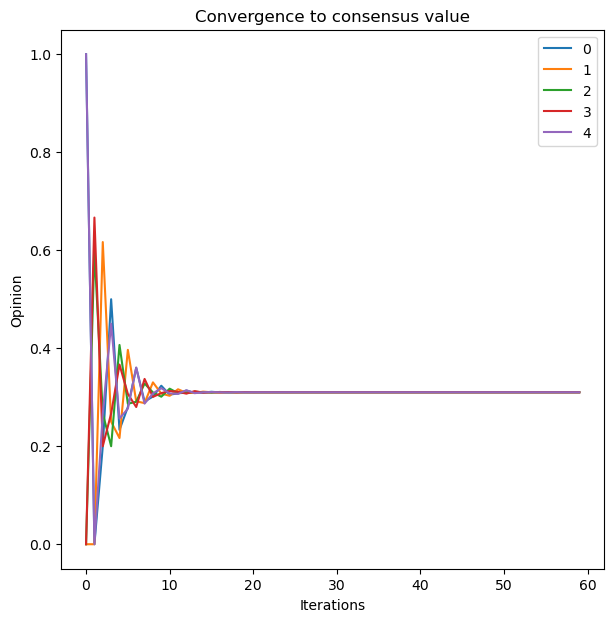

In [21]:
itrs = 60
x = np.zeros((len(graph.nodes), itrs))
x[:, 0] = np.array([1, 0, 0, 0, 1]) # initial condition

# evolve the states
for t in range(1, itrs):
    x[:, t] = P_matrix @ x[:, t - 1]

values, vectors = np.linalg.eig(P_matrix.T)
# selecting the eigenvalue 1
for index in np.where(np.isclose(values, 1))[0]:
    pi = vectors[:, index].real / np.sum(vectors[:, index].real)

print("consensus state:")
print(x[:, itrs - 1])
print("consensus value:")
print(pi @ (x[:, 0])) # multiplying pi by the initial condition

# plotting
fig = plt.figure(1, figsize=(7, 7))
ax = plt.subplot(111)
ax.set_title("Convergence to consensus value")
plt.xlabel('Iterations')
plt.ylabel('Opinion')
for node in range(0, graph.number_of_nodes()):
    ax.plot(x[node, :], label=node)
ax.legend()
plt.show()

# 1f

In [22]:
vars = [2,1,1,1,2]

cons_realizations = []
for i in range(100000):
    o = np.random.normal(0,np.sqrt(2), size=(1,))
    abc = np.random.normal(0,1, size= (3,))
    d = np.random.normal(0,np.sqrt(2), size=(1,))
    tmp = np.concatenate((o, abc, d))
    tmp = pi.dot(tmp)
    cons_realizations.append(tmp)

con_var = np.square(pi).dot(vars)
print("consensus variance:")
print(con_var)

est = np.std(cons_realizations) ** 2
print("estimation of consensus variance:")
print(est)

consensus variance:
0.2585339214450746
estimation of consensus variance:
0.2595816686208371


# 1g

Arbitary initial condition x(0):
[0.103 0.923 0.242 0.796 0.888]
The asymptotic state x:
[0.888 0.888 0.888 0.888 0.888]
consensus state's variance:
0.08125200879312035


C:\Users\DASHTI\AppData\Local\Temp\ipykernel_3444\3515760249.py:7: FutureWarning:

adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.



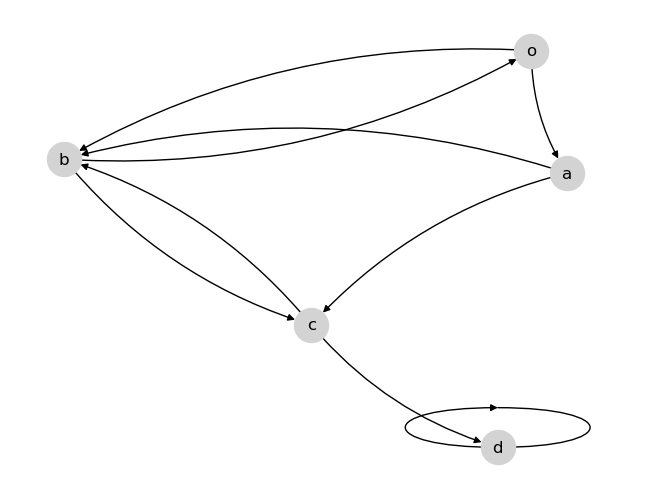

In [23]:
graph.remove_edges_from([('d', 'a'), ('d', 'c')]) # remove edges
graph.add_weighted_edges_from([('d', 'd', float("{0:.2f}".format(1 / 1000000)))]) # self loop to d
nx.draw(graph, with_labels=True, node_size=600, font_size=12, node_color='lightgray',
        connectionstyle='arc3, rad = 0.15')

# calculating P
W = nx.adjacency_matrix(graph).toarray()
W[4][4] = 0.0000001  # self loop weight lowest possible
D_matrix = np.diag(np.sum(W, axis=1))
P_matrix = np.linalg.inv(D_matrix) @ W

x = np.random.rand(5) # initial condition
print("Arbitary initial condition x(0):")
print(x)

for i in range(0, 100):
    x = P_matrix @ x
print("The asymptotic state x:")
print(x)

# numerical simulations
alpha = np.zeros(300)
for i in range(300):
    x = np.random.rand(5)
    for n in range(0, 400):
        x = P_matrix @ x
    alpha[i] = (1 / 2 - np.mean(x)) * (1 / 2 - np.mean(x))

print("consensus state's variance:")
print(np.mean(alpha))

# 1h

C:\Users\DASHTI\AppData\Local\Temp\ipykernel_3444\3828443143.py:15: FutureWarning:

adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.



initial condition x(0):
[0.033 0.396 0.12  0.868 0.43 ]
Final opinions:
[0.632 0.615 0.767 0.43  0.868]


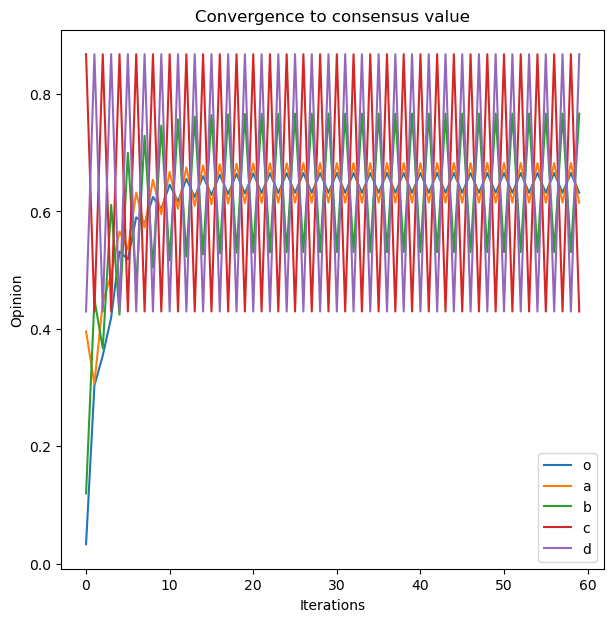

In [24]:
itrs = 60
graph = nx.DiGraph()
graph.add_weighted_edges_from([
    ('o', 'a', float("{0:.2f}".format(2 / 5))),
    ('o', 'b', float("{0:.2f}".format(1 / 5))),
    ('a', 'b', float("{0:.2f}".format(3 / 4))),
    ('a', 'c', float("{0:.2f}".format(1 / 4))),
    ('b', 'o', float("{0:.2f}".format(1 / 2))),
    ('b', 'c', float("{0:.2f}".format(1 / 2))),
    ('c', 'd', float("{0:.2f}".format(2 / 3))),
    ('d', 'c', float("{0:.2f}".format(1 / 3))),
])

# reconstructing P
W = nx.adjacency_matrix(graph).toarray()
degrees = np.sum(W, axis=1)
D_matrix = np.diag(degrees)
P_matrix = np.linalg.inv(D_matrix) @ W

x = np.zeros((5, itrs))
x[:, 0] = np.random.rand(5) # initial condition
print('initial condition x(0):')
print(x[:, 0])

# evolving the states
for t in range(1, itrs):
    x[:, t] = P_matrix @ x[:, t - 1]

print("Final opinions:")
print(x[:, itrs - 1])

fig = plt.figure(figsize=(7, 7), dpi=100)
ax = plt.subplot(111)
node_names = ['o', 'a', 'b', 'c', 'd']

for node in range(5):
    op = x[node, :]
    ax.plot(range(itrs), op, label=f'{node_names[node]}')

ax.legend()
ax.set_title("Convergence to consensus value")
plt.xlabel('Iterations')
plt.ylabel('Opinion')
plt.show()

# **Exercise2**

In [ ]:

# Part A
# Generate an array of particles from 0 to 99
particles = np.array(range(100)).astype(np.int32)

# Call a function to simulate average time for particles to return to node b
simulationAvgTime = simulationAvgTime(start=2, target=2, simulations=len(particles) * 1000)

# Print results and error
print("The average time for a particle to start from node b and return to node b:", simulationAvgTime)
print("Error simulation", abs(simulationAvgTime - theoretical_return_time))

# Part B
def sim_avg_particles(num_particle, time_in_sec):
    particles = num_particle
    time_units = time_in_sec

    # Initialize node distribution for this question we have 5 nodes so we put first one equal to 100 and others equal to zero
    nodes_s = np.array([[100, 0, 0, 0, 0]], dtype=int)

    # Initialize node counts
    n_nodes = np.zeros(len(graph.nodes), dtype=int)
    n_nodes[0] = particles

    # Calculate initial probabilities and cumulative probabilities
    P_nodes = n_nodes / particles
    P_nodes_cum = np.cumsum(P_nodes)

    # Initialize transition times
    transition_times = [0]

    # Initialize random time until the next transition
    t_next = -np.log(np.random.rand()) / particles
    i = 0

    # Initialize time sequence
    timeSeq = [0]

    # Initialize cumulative transition probabilities
    Q_cum = np.cumsum(Q_matrix, axis=1)

    # Simulate particle transitions
    while transition_times[i] < time_units:
        i += 1

        transition_times.append(transition_times[i - 1] + t_next)
        timeSeq.append(transition_times[-1])

        # Determine starting and destination nodes based on probabilities
        start_index = np.argmax(P_nodes_cum > np.random.rand())
        dest_index = np.argmax(Q_cum[start_index] >= np.random.rand())

        # Update node counts
        n_nodes[dest_index] += 1
        n_nodes[start_index] -= 1

        # Concatenate node counts to nodes_s array
        nodes_s = np.concatenate((nodes_s, [n_nodes]), axis=0)

        # Update probabilities and cumulative probabilities
        P_nodes = n_nodes / particles
        P_nodes_cum = np.cumsum(P_nodes)

        # Update random time until the next transition
        t_next = -np.log(np.random.rand()) / particles

    # Calculate average particles per node
    avg_particles = {}
    for nodes, avg_value in zip(graph.nodes, np.average(nodes_s, axis=0)):
        avg_particles[nodes] = round(avg_value, 2)

    return avg_particles, timeSeq, nodes_s

def visualize_simulation(time_sequence, nodes_seq):
    # Plot the results of the simulation
    timeSequence = time_sequence
    nd = nodes_seq

    fig, ax = plt.subplots(figsize=(5, 4))
    labels = dict(enumerate(graph.nodes))

    for i in range(len(graph)):
        ax.plot(timeSequence, nd[:, i], label=labels[i])

    ax.legend()
    ax.set_title("Node perspective: Number of particles per node per time unit")
    plt.xlabel('Time units')
    plt.ylabel('Number of particles')
    plt.savefig("Ex2_B.svg")
    plt.show()

# Call the simulation function and visualize the results
ParticlesAtFinalStep, TimeSequences, NodeCounts = sim_avg_particles(100, 60)
print("Particles per node at final step: ", ParticlesAtFinalStep)
print("Average number of particles in every node pi_bar: ", 100 * invariant_distribution)
visualize_simulation(TimeSequences, NodeCounts)


# Exercise 3

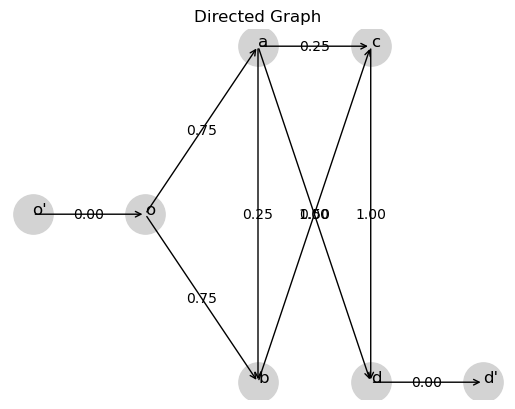

In [ ]:

import matplotlib.pyplot as plt

# Define the graph with weighted edges
edges = {'o': {'a': 3/4, 'b': 3/4},
         'a': {'b': 1/4, 'c': 1/4, 'd': 2/4},
         'b': {'c': 1},
         'c': {'d': 1},
         'd': {"d'": 0},
         "o'": {'o': 0}}

# Define node positions
pos = {'o': (0, 0), 'a': (1, 2), 'b': (1, -2), 'c': (2, 2), 'd': (2, -2), "d'": (3, -2), "o'": (-1, 0)}

# Draw nodes
for node, position in pos.items():
    plt.scatter(*position, label=node, s=800, color='lightgray')

# Draw edges with arrows and labels
for start_node, edges_dict in edges.items():
    for end_node, weight in edges_dict.items():
        plt.annotate("", xy=pos[end_node], xytext=pos[start_node], arrowprops=dict(arrowstyle="->", connectionstyle="arc3"), alpha=0.5, color='black')
        plt.text((pos[start_node][0] + pos[end_node][0]) / 2, (pos[start_node][1] + pos[end_node][1]) / 2, f"{weight:.2f}", fontsize=10, ha='center', va='center')

# Draw labels for nodes
for node, position in pos.items():
    plt.text(position[0], position[1], node, fontsize=12, color='black')

# Set plot title and turn off axis
plt.title("Directed Graph")
plt.axis('off')

# Show the plot
plt.show()


# a1

In [ ]:
import plotly.graph_objects as go
def select_initial_node(particle_counts, particle_rate):
    # Calculate the total number of particles
    total_particles = particle_rate + np.sum(particle_counts)

    # Calculate cumulative probabilities for each node
    cumulative_probabilities = np.concatenate(([0], np.cumsum(particle_counts) / total_particles, [1]))

    # Generate a random value between 0 and 1
    random_value = np.random.rand()

    # Find the index corresponding to the selected node
    for i in range(len(cumulative_probabilities) - 1):
        if cumulative_probabilities[i] <= random_value < cumulative_probabilities[i + 1]:
            # Return the index of the selected node and the total number of particles
            return i, total_particles

def simulate_particle_system_proportional(time_units, rate, Q_cum):
    # Determine the number of nodes in the system
    G_nodes = len(Q_cum) + 1

    # Initialize arrays to track node particles, transition times, and node history
    node_particles = np.zeros(G_nodes - 1)
    transition_times = [0]
    hist_nodes_list = [np.array([0, 0, 0, 0, 0])]

    # Main simulation loop
    while True:
        # Select an initial node and corresponding particle count
        start_node, particles = select_initial_node(node_particles, rate)

        # Calculate the time of the next transition event
        t_next = transition_times[-1] - np.log(np.random.rand()) / particles

        # Perform the transition based on the selected initial node
        if start_node == 5:
            node_particles[0] += 1
        elif start_node == 4:
            node_particles[4] -= 1
        else:
            # Determine the end node based on cumulative probabilities
            end_node = np.argwhere(Q_cum[start_node] > np.random.rand())[0][0]
            node_particles[start_node] -= 1
            node_particles[end_node] += 1

        # Update transition times and record the node history
        transition_times.append(t_next)
        hist_nodes_list.append(node_particles.copy())

        # Check if the simulation time exceeds the specified limit
        if t_next > time_units:
            break

    # Convert the recorded node history to a numpy array for analysis
    hist_nodes = np.array(hist_nodes_list)
    return hist_nodes, transition_times

# Set the number of nodes
G_nodes = 6

# Input rate for simulation
input_rate = 100
time_units = 60

# Define the lambda matrix representing transition rates between nodes
transition_matrix = np.array([[0, 3/4, 3/4, 0, 0],
                              [0, 0, 1/4, 1/4, 2/4],
                              [0, 0, 0, 1, 0],
                              [0, 0, 0, 0, 1],
                              [0, 0, 0, 0, 0]])

# Calculate the cumulative distribution of the normalized transition rate matrix
Q_matrix = transition_matrix / np.max(np.sum(transition_matrix, axis=1))
Q_matrix += np.diag(np.ones(G_nodes - 1) - np.sum(Q_matrix, axis=1))
Q_cumulative = np.cumsum(Q_matrix, axis=1)

def plot_proportional_trajectories(transition_times, hist_nodes, input_rate):
    """
    Plot the trajectories of particle counts at each node over time.

    Parameters:
    - transition_times (list): List of transition times during the simulation.
    - hist_nodes (numpy.ndarray): History of particle counts at each node.
    - input_rate (float): Input rate for the simulation.
    """
    # Mapping for node labels
    labels = {0: 'o', 1: 'a', 2: 'b', 3: 'c', 4: 'd'}

    # Create a plotly figure
    fig = go.Figure()

    # Add traces for each node
    for i in range(hist_nodes.shape[1]):
        fig.add_trace(go.Scatter(x=transition_times, y=hist_nodes[:, i], mode='lines', name=labels[i]))

    # Update layout for better visualization
    fig.update_layout(
        title="Input rate = {}".format(input_rate),
        xaxis_title="Time units",
        yaxis_title="Number of particles",
        showlegend=True,
        legend=dict(x=0, y=1),
        margin=dict(l=0, r=0, t=30, b=0)
    )
    fig.show()

# Simulate and plot using the alternative functions
hist_nodes, transition_times = simulate_particle_system_proportional(time_units, input_rate, Q_cumulative)
plot_proportional_trajectories(transition_times, hist_nodes, input_rate)


# a2

In [ ]:


# Function to simulate the system and return the maximum number of particles reached
def simulate_max_particles(input_rate):
    # Set the number of nodes
    G_nodes = 6

    # Simulation parameters
    time_units = 60

    # Define the lambda matrix representing transition rates between nodes
    transition_matrix = np.array([[0, 3/4, 3/4, 0, 0],
                                  [0, 0, 1/4, 1/4, 2/4],
                                  [0, 0, 0, 1, 0],
                                  [0, 0, 0, 0, 1],
                                  [0, 0, 0, 0, 0]])

    # Calculate the cumulative distribution of the normalized transition rate matrix
    Q_matrix = transition_matrix / np.max(np.sum(transition_matrix, axis=1))
    Q_matrix += np.diag(np.ones(G_nodes - 1) - np.sum(Q_matrix, axis=1))
    Q_cumulative = np.cumsum(Q_matrix, axis=1)

    # Simulate the system
    hist_nodes, _ = simulate_particle_system_proportional(time_units, input_rate, Q_cumulative)

    # Return the maximum number of particles reached
    max_particles = np.max(np.sum(hist_nodes, axis=1))
    return max_particles

# Test different input rates
max_input_rate = 1000  # Start with a high value
stable_input_rate = None

while max_input_rate > 0:
    # Simulate the system for a given input rate
    max_particles = simulate_max_particles(max_input_rate)

    # Check if the system is stable (particles don't blow up)
    threshold_value = G_nodes * 1000  # Adjust based on the system size and behavior
    if max_particles <= threshold_value:
        stable_input_rate = max_input_rate
        break

    # Adjust the decrement value based on the search granularity
    decrement_value = 100
    max_input_rate -= decrement_value

print("The largest stable input rate is:", stable_input_rate)


The largest stable input rate is: 1000


# b1

In [ ]:
def select_initial_node(particle_counts, particle_rate):
    # Calculate the total number of particles
    total_particles = particle_rate + np.sum(particle_counts)

    # Calculate cumulative probabilities for each node
    cumulative_probabilities = np.concatenate(([0], np.cumsum(particle_counts) / total_particles, [1]))

    # Generate a random value between 0 and 1
    random_value = np.random.rand()

    # Find the index corresponding to the selected node
    for i in range(len(cumulative_probabilities) - 1):
        if cumulative_probabilities[i] <= random_value < cumulative_probabilities[i + 1]:
            # Return the index of the selected node and the total number of particles
            return i, total_particles

def simulate_fixed_rate(time_units, rate, Q_cum):
    # Determine the number of nodes in the system
    G_nodes = len(Q_cum) + 1

    # Initialize arrays to track node particles, transition times, and node history
    node_particles = np.zeros(G_nodes - 1)
    transition_times = [0]
    hist_nodes_list = [np.array([0, 0, 0, 0, 0])]

    # Main simulation loop
    while True:
        # Select an initial node and corresponding particle count using a fixed rate
        start_node, particles = select_initial_node(node_particles, rate)

        # Calculate the time of the next transition event using the fixed rate
        t_next = transition_times[-1] - np.log(np.random.rand()) / rate

        # Perform the transition based on the selected initial node
        if start_node == 5:
            node_particles[0] += 1
        elif start_node == 4:
            node_particles[4] -= 1
        else:
            # Determine the end node based on cumulative probabilities
            end_node = np.argwhere(Q_cum[start_node] > np.random.rand())[0][0]
            node_particles[start_node] -= 1
            node_particles[end_node] += 1

        # Update transition times and record the node history
        transition_times.append(t_next)
        hist_nodes_list.append(node_particles.copy())

        # Check if the simulation time exceeds the specified limit
        if t_next > time_units:
            break

    # Convert the recorded node history to a numpy array for analysis
    hist_nodes = np.array(hist_nodes_list)
    return hist_nodes, transition_times
# Set the number of nodes
G_nodes = 6

# Input rates for simulation
input_rates = [1]
time_units = 60

# Define the lambda matrix representing transition rates between nodes
transition_matrix = np.array([[0, 3/4, 3/4, 0, 0],
                              [0, 0, 1/4, 1/4, 2/4],
                              [0, 0, 0, 1, 0],
                              [0, 0, 0, 0, 1],
                              [0, 0, 0, 0, 0]])

# Calculate the cumulative distribution of the normalized transition rate matrix
Q_matrix = transition_matrix / np.sum(transition_matrix, axis=1, keepdims=True)
Q_cumulative = np.cumsum(Q_matrix, axis=1)

# Simulate and plot using the alternative functions
def plot_proportional_trajectories_fixed(transition_times, hist_nodes, input_rate):
    """
    Plot the trajectories of particle counts at each node over time.

    Parameters:
    - transition_times (list): List of transition times during the simulation.
    - hist_nodes (numpy.ndarray): History of particle counts at each node.
    - input_rate (float): Input rate for the simulation.
    """
    labels = {0: 'o', 1: 'a', 2: 'b', 3: 'c', 4: 'd'}
    fig = go.Figure()

    # Add traces for each node
    for i in range(hist_nodes.shape[1]):
        fig.add_trace(go.Scatter(x=transition_times, y=hist_nodes[:, i], mode='lines', name=labels[i]))

    # Update layout for better visualization
    fig.update_layout(
        title="Input rate = {}".format(input_rate),
        xaxis_title="Time units",
        yaxis_title="Number of particles",
        showlegend=True,
        legend=dict(x=0, y=1),
        margin=dict(l=0, r=0, t=30, b=0)
    )
    fig.show()

for input_rate in input_rates:
    hist_nodes, transition_times = simulate_fixed_rate(time_units, input_rate, Q_cumulative)
    plot_proportional_trajectories_fixed(transition_times, hist_nodes, input_rate)


C:\Users\DASHTI\AppData\Local\Temp\ipykernel_3444\4140453255.py:71: RuntimeWarning:

invalid value encountered in true_divide



# b2

In [ ]:
# Function to find the largest stable input rate for the fixed rate system
def find_largest_stable_input_rate_fixed():
    max_input_rate_fixed = 1000  # Start with a high value
    stable_input_rate_fixed = None

    while max_input_rate_fixed > 0:
        # Simulate the system for a given fixed input rate
        max_particles_fixed = simulate_max_particles(max_input_rate_fixed)

        # Check if the system is stable (particles don't blow up)
        if max_particles_fixed <= G_nodes * 1000:  # Adjust 1000 based on the system size
            stable_input_rate_fixed = max_input_rate_fixed
            break

        max_input_rate_fixed -= 100  # Adjust the decrement value based on the search granularity

    return stable_input_rate_fixed

# Find the largest stable input rate for the fixed rate system
stable_input_rate_fixed = find_largest_stable_input_rate_fixed()

print("The largest stable input rate for the fixed rate system is:", stable_input_rate_fixed)


The largest stable input rate for the fixed rate system is: 1000
